## GERDA LIGHT
This notebook is meant to test out and use the reduced  version of GERDA.

The "Light" version build upon the synthetic population created with the orginial GERDA by using the agent_information Dataframe (*ai.df) and the contact table p_l_t, which states the location ID for all agents for all timesteps (hours) for one week.

Worklfow:
- create a new world object 
- initialize a model with this world object
- set seed infections
- simulate the model 


PS.: ## - comment,  # - hide lines


In [12]:
import GERDA_light as gl 
import logging as log
import matplotlib.pyplot as plt
logger = log.getLogger()
logger.setLevel(log.INFO)

In [6]:
## initialize a world 
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )

INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1


In [7]:
## initialize a model 
model = gl.SIS_model(w1)

## infect an agent 
i = 1   # selected agent ID 
model.world.agents[i].state=1 ## infect one agent
model.world.agents[i].times['infection'] = 0 


INFO:root:create contact list


iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times


In [8]:
## run a simulation
model.run(timespan=2000, only_inf_rel_contacts=True)

In [10]:
ai_df = model.world.ai_df
display(ai_df.head(5))


,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,959.0,0,959.0
1,152,265,under_age,16,265,5,1,985.0,0,985.0
2,205,373,public_worker,34,373,2,1,1229.0,0,1229.0
3,564,1059,adult,53,1059,2,1,1187.0,0,1187.0
4,100,177,adult,40,177,2,1,963.0,0,963.0


Text(0, 0.5, 'count, h')

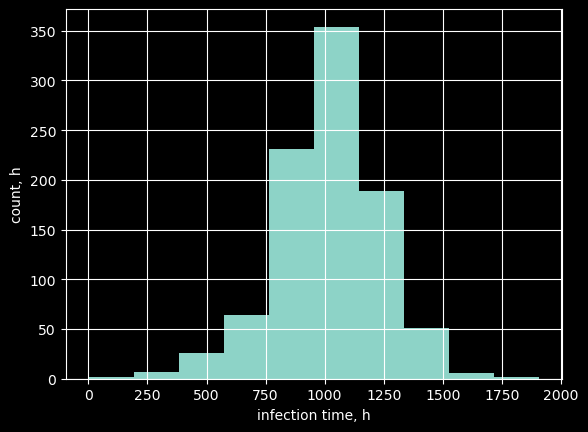

In [13]:
ai_df['infection_time'].hist()
plt.xlabel('infection time, h')
plt.ylabel('count, h')